In [46]:
import networkx as nx

# Load the GEXF file
graph = nx.read_gexf('train_network_jp_coords.gexf')

# Basic operations
print("Nodes:", graph.nodes())
print("Edges:", graph.edges())

# Example: Plot the graph (optional)
# import matplotlib.pyplot as plt

# nx.draw(graph, with_labels=True)
# plt.show()


Nodes: ['Kogota', 'Kami-Wakuya', 'Wakuya', 'Maeyachi', 'Kakeyama', 'Kanomata', 'Sobanokami', 'Ishinomaki', 'Rikuzen-Inai', 'Watanoha', 'Mangokuura', 'Sawada', 'Urashuku', 'Onagawa', 'Sawara', 'Katori', 'Jūnikyō', 'Itako', 'Nobukata', 'Kashimajingū', 'Kashima-Soccer Stadium（Seasonal）', 'Chiba', 'Higashi-Chiba', 'Tsuga', 'Yotsukaidō', 'Monoi', 'Sakura', 'Minami-Shisui', 'Enokido', 'Yachimata', 'Hyūga', 'Narutō', 'Matsuo', 'Yokoshiba', 'Iigura', 'Yōkaichiba', 'Higata', 'Asahi', 'Iioka', 'Kurahashi', 'Saruda', 'Matsugishi', 'Chōshi', 'Chigasaki', 'Kita-Chigasaki', 'Kagawa', 'Samukawa', 'Miyayama', 'Kurami', 'Kadosawabashi', 'Shake', 'Atsugi', 'Ebina', 'Iriya', 'Sōbudaishita', 'Shimomizo', 'Harataima', 'Banda', 'Kamimizo', 'Minami-Hashimoto', 'Hashimoto', 'Kitaura', 'Rikuzen-Yachi', 'Furukawa', 'Tsukanome', 'Nishi-Furukawa', 'Higashi-Ōsaki', 'Nishi-Ōsaki', 'Iwadeyama', 'Yūbikan', 'Kaminome', 'Ikezuki', 'Kawatabi-Onsen', 'Narukogotenyu', 'Naruko-Onsen', 'Nakayamadaira-Onsen', 'Sakaida', 'Aka

In [47]:
from geopy.geocoders import Nominatim
import pickle
geolocator = Nominatim(user_agent="geo_enrichment")
coordinates = pickle.load(open("station_coords.pkl", "rb"))

for node, data in graph.nodes(data=True):
    if node in coordinates:
        # check if location range lies within 128.75,28.9,149.87,47.05
        if coordinates[node][0] < 28.9 or coordinates[node][0] > 47.05 or coordinates[node][1] < 128.75 or coordinates[node][1] > 149.87:
            print(f"Coordinates for {node} out of range: {coordinates[node]}")
        else:
            continue
    station_name = data.get('label', node)  # Replace 'label' with the attribute holding station names
    # replace _ with space
    location = geolocator.geocode(f"{station_name}, Japan")
    if location:
        coordinates[node] = (location.latitude, location.longitude)
        print(f"{station_name}: {location.latitude}, {location.longitude}")
    else:
        print(f"Could not find geocoordinates for {station_name}")

# # Add coordinates back to the graph
# for node, coord in coordinates.items():
#     graph.nodes[node]['latitude'] = coord[0]
#     graph.nodes[node]['longitude'] = coord[1]


In [48]:
location = geolocator.geocode("Kogota, Japan")
print(f"Longitude: {location.longitude}, Latitude: {location.latitude}")

Longitude: 141.0642558, Latitude: 38.5414704


In [49]:
# only keep nodes within 137.5,34.41,142.17,41.52
copy = graph.copy()
for node, data in copy.nodes(data=True):
    if node in coordinates:
        if coordinates[node][0] < 34.41 or coordinates[node][0] > 41.52 or coordinates[node][1] < 137.5 or coordinates[node][1] > 142.17:
            graph.remove_node(node)
            print(f"Removed {node} with coordinates {coordinates[node]}")
        else:
            continue
        
# Save the filtered graph
nx.write_gexf(graph, 'train_network_jp_coords_filtered.gexf')

Removed Enokido with coordinates (34.9049813, 136.828199)
Removed Hyūga with coordinates (32.4225483, 131.6244443)
Removed Kagawa with coordinates (34.2480104, 134.0586579)
Removed Hashimoto with coordinates (34.3258291, 135.6190034)
Removed Naka-Oguni with coordinates (33.0774518, 131.14148)
Removed Takeoka with coordinates (31.5932303, 130.5120818)
Removed Kokonoe with coordinates (33.197066, 131.2111863)
Removed Chitose with coordinates (42.8209335, 141.6509612)
Removed Futomi with coordinates (43.1897923, 141.4489283)
Removed Kiyosato with coordinates (43.8349367, 144.5945252)
Removed Takaiwa with coordinates (33.2979488, 129.6369864)
Removed Kaize with coordinates (33.2134293, 129.7016395)
Removed Kitayama with coordinates (33.9324762, 135.9690709)
Removed Takase with coordinates (34.1839067, 133.7110527)
Removed Hayato with coordinates (31.743887, 130.7402683)
Removed Ino with coordinates (33.5456773, 133.4284048)
Removed Shirogane with coordinates (35.0094357, 135.7810717)
Remov

In [42]:
# save coords in pkl
import pickle
with open('station_coords.pkl', 'wb') as f:
    pickle.dump(coordinates, f)

In [36]:
# find stations that are not in coordinates
not_found = []
for node, data in graph.nodes(data=True):
    if node not in coordinates:
        not_found.append(node)


In [37]:
print(len(not_found))
print(not_found)

0
[]


In [41]:
coordinates['Kashima-Soccer Stadium（Seasonal）'] = (35.992165929679224, 140.63623237239304)
coordinates['Narukogotenyu'] = (38.744440218212596, 140.73785073505604)
coordinates['Izu-Taga'] = (35.05901193496811, 139.0669537886396)
coordinates['Kawasakishimmachi'] = (35.51825091971077, 139.69916505895594)
coordinates['Oku-Nikkawa'] = (38.32593028956428, 140.59437427543426)
coordinates['Takasakitonyamachi'] = (36.34603388091403, 139.01709422902002)
coordinates['Shim-Maebashi'] = (36.378886555411405, 139.04709478346746)
coordinates['Yudakinshūko'] = (39.29533714119048, 140.83555765517636)
coordinates['Uchinonishigaoka'] = (37.84600278676527, 138.92667993386777)
coordinates['Shim-Mobara'] = (35.44941210121682, 140.2996875794844)
coordinates['Uzem-Matsuoka'] = (38.04550012435881, 139.78064585019416)
coordinates['Sibutami'] = (39.83453718420965, 141.15401187248173)
coordinates['Arayashimmachi'] = (40.097618615502874, 141.0491422097993)
coordinates['Rikucyū-Ōsato'] = (40.15843617541601, 140.79343950938141)
coordinates['Naganoharakusatsuguchi'] = (36.54667063897614, 138.64817337401826)
coordinates['Kammata'] = (37.324825295651074, 140.65948835813518)
coordinates['Aōzu'] = (37.654177845805776, 138.8734957520894)

In [43]:
# Add theses coordinates back to the graph

for node, coord in coordinates.items():
    graph.nodes[node]['latitude'] = coord[0]
    graph.nodes[node]['longitude'] = coord[1]
    
# save the graph
nx.write_gexf(graph, 'train_network_jp_coords.gexf')

In [39]:
# from deep_translator import GoogleTranslator
# GoogleTranslator(source='bn', target='en').translate("চট্টগ্রাম ক্যান্টনমেন্ট") 

'Chittagong Cantonment'

In [43]:
# import json
# from rapidfuzz import process, fuzz
# from googletrans import Translator
# from deep_translator import GoogleTranslator
# from tqdm import tqdm

# # Initialize translator
# translator = Translator()

# # Load your stations list
# stations_to_find = not_found

# # Load GeoJSON data
# with open('/home/terrarium/playground/cse6413/hotosm_bgd_railways_points_geojson/railway_stations.geojson', 'r') as f:
#     geojson_data = json.load(f)

# # Extract station names and coordinates
# geojson_stations = {}
# for feature in tqdm(geojson_data['features']):
#     properties = feature['properties']
#     english_name = properties.get('name:en')
#     bangla_name = properties.get('name')
#     # remove "Railway", "Station" from english name. They may occur as substrings, ignore case
#     if english_name:
#         english_name = english_name.lower()
#         english_name = english_name.replace("railway", "").replace("station", "").strip()        
#         geojson_stations[english_name] = feature['geometry']['coordinates']
#         continue
#     if bangla_name:
#         bangla_name = GoogleTranslator(source='bn', target='en').translate(bangla_name).lower()
#         bangla_name = bangla_name.replace("railway", "").replace("station", "").strip()
#         geojson_stations[bangla_name] = feature['geometry']['coordinates']

# # Perform fuzzy matching
# matched_stations = {}
# unmatched_stations = []

# for station in stations_to_find:
#     # Get the best match for the station name
#     lowercased_station = station.lower()
#     match, score, _ = process.extractOne(
#         lowercased_station, geojson_stations.keys(), scorer=fuzz.token_sort_ratio
#     )
    
#     # Accept matches above a similarity threshold
#     if score > 80:
#         matched_stations[station] = {
#             'geojson_name': match,
#             'coordinates': geojson_stations[match],
#             'similarity_score': score,
#         }
#     else:
#         unmatched_stations.append(station)

# # Output results
# print("Matched Stations:")
# for station, match_info in matched_stations.items():
#     print(f"{station} -> {match_info['geojson_name']} (Coords: {match_info['coordinates']}, Score: {match_info['similarity_score']})")

# print("\nUnmatched Stations:")
# print(unmatched_stations)

# # # Save matched results to a file
# # with open('matched_stations.json', 'w') as f:
# #     json.dump(matched_stations, f, indent=4)

# # # Save unmatched stations for manual review
# # with open('unmatched_stations.json', 'w') as f:
# #     json.dump(unmatched_stations, f, indent=4)


  0%|          | 0/434 [00:00<?, ?it/s]

100%|██████████| 434/434 [01:40<00:00,  4.32it/s]

Matched Stations:
Bamondanga -> bamandanga (Coords: [89.4456638, 25.533746], Score: 90.0)
Mubarakganj -> mubarokganj (Coords: [89.1244465, 23.4004363], Score: 90.9090909090909)
Kotchandpur -> kotchadpur (Coords: [89.0134161, 23.4156897], Score: 95.23809523809523)
Ahsanganj -> hasanganj (Coords: [89.4299767, 25.5717331], Score: 88.88888888888889)
Jamtail -> jamtoil (Coords: [89.6604338, 24.3612687], Score: 85.71428571428572)
Boral_Bridge -> baral bridge (Coords: [89.3808543, 24.214958], Score: 83.33333333333334)
Chandradighalia -> chandra dighalia (Coords: [89.7768778, 23.0735283], Score: 96.7741935483871)
Choto Bahirbag -> chhoto bahirbagh (Coords: [89.7817216, 23.1408061], Score: 93.33333333333333)
Naliagram -> naliagram (Coords: [89.6056352, 23.6025242], Score: 100.0)
Mirzapur -> mirjapur (Coords: [90.1014131, 24.1055318], Score: 87.5)
Amirabad -> amirabad (Coords: [89.7442869, 23.6396538], Score: 100.0)
Muladhuli -> muladuli (Coords: [89.1432797, 24.1638224], Score: 94.1176470588235

In [47]:
# # update the csv file with the matched stations
# import csv
# with open('coordinates.csv', 'r') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
    
#     for i, row in enumerate(rows):
#         station_name = row[0]
#         lat = row[1]
#         lon = row[2]
#         if lat == '' or lon == '':
#             if station_name in matched_stations:
#                 rows[i][1] = matched_stations[station_name]['coordinates'][1]
#                 rows[i][2] = matched_stations[station_name]['coordinates'][0]
                
# with open('coordinates_upd.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerows(rows)

In [52]:
# # open coordinates.csv, read the file and and put all empty lat longs at the last

# import csv
# with open('coordinates_sorted.csv', 'r') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
    
#     # sort the rows based on lat long
#     rows.sort(key=lambda x: (x[1] == '', x[2] == ''))
    
# with open('coordinates_sorted.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerows(rows)

In [55]:
# # open railway_stations.csv, read the file and update train_network.gexf with the coordinates
# # all stations are guaranteed to have coordinates

# import csv
# import networkx as nx

# # Load the GEXF file
# graph = nx.read_gexf('train_network_jp.gexf')

# with open('railway_coordinates.csv', 'r') as f:
#     reader = csv.reader(f)
#     # skip first row
#     next(reader)
#     for row in reader:
#         station_name = row[0]
#         lat = row[1]
#         lon = row[2]
#         graph.nodes[station_name]['latitude'] = lat
#         graph.nodes[station_name]['longitude'] = lon
        
# nx.write_gexf(graph, 'train_network_with_coords.gexf')

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import networkx as nx

# # Read the GeoJSON file
# gdf = gpd.read_file('small_bangladesh_geojson_adm2_64_districts_zillas.geojson')

# # Create a graph of adjacency
# def create_adjacency_graph(geodataframe):
#     graph = nx.Graph()
#     for idx, geometry in geodataframe.iterrows():
#         graph.add_node(idx)
#         for neighbor_idx, neighbor_geometry in geodataframe.iterrows():
#             if idx != neighbor_idx and geometry.geometry.touches(neighbor_geometry.geometry):
#                 graph.add_edge(idx, neighbor_idx)
#     return graph

# # Generate adjacency graph
# adj_graph = create_adjacency_graph(gdf)

# # Perform graph coloring (minimum colors for adjacent areas)
# colors = nx.coloring.greedy_color(adj_graph, strategy="largest_first")

# # Add the color information to the GeoDataFrame
# gdf['color'] = gdf.index.map(colors)

# # Plot the GeoDataFrame with colors
# fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(column='color', cmap='tab20', legend=True, ax=ax)
# plt.title("Bangladesh Districts")
# plt.axis("off")
# plt.show()


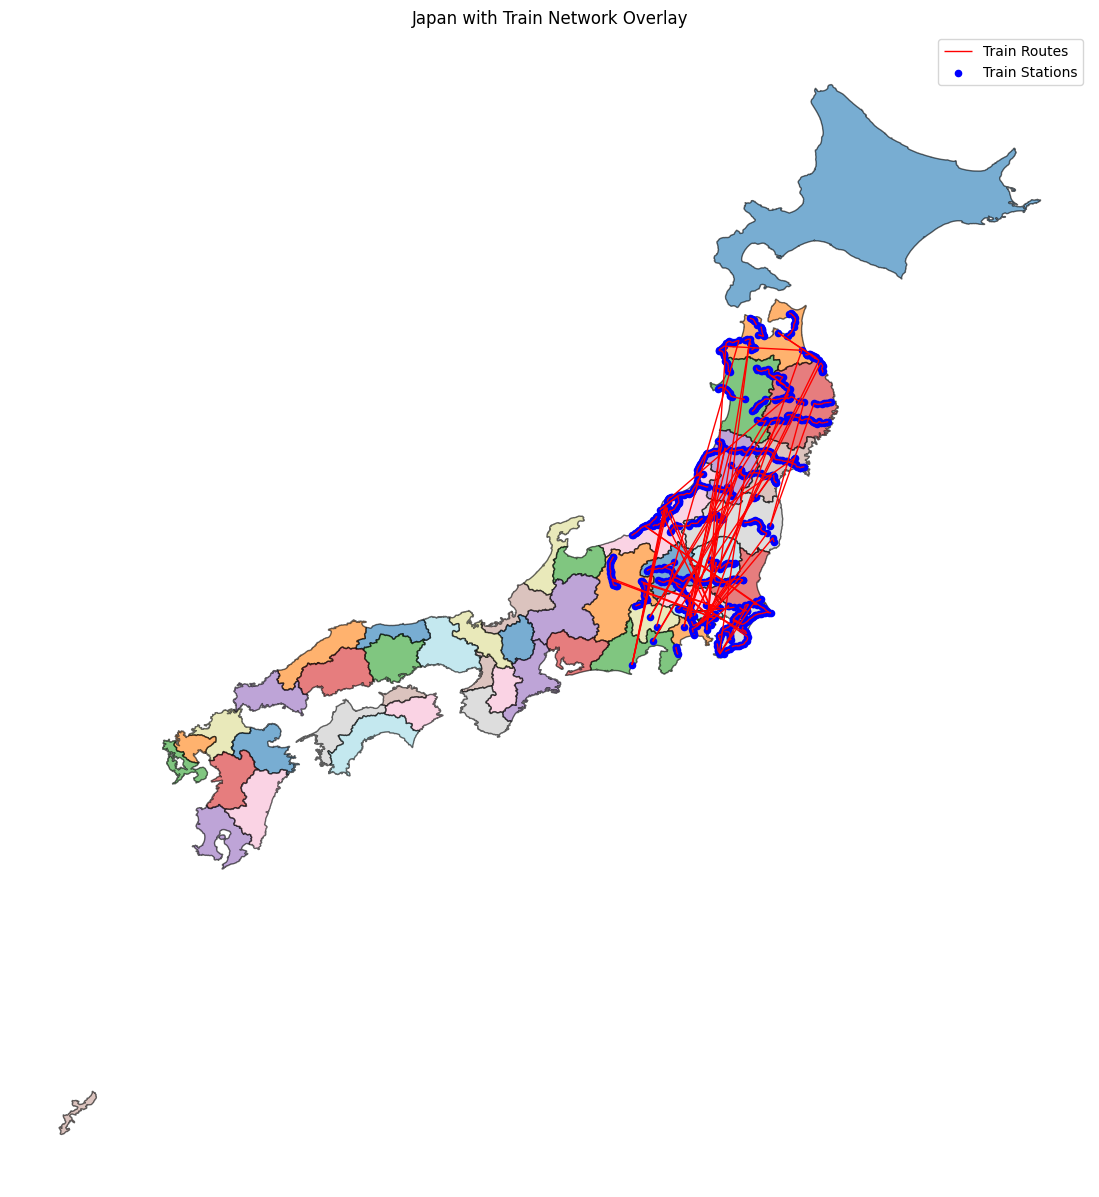

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import Point, LineString

# Step 1: Load GeoJSON file
districts_gdf = gpd.read_file('japan.geojson')

# Create adjacency-based coloring for districts
districts_gdf['color'] = districts_gdf.index % 10  # Use modulo for coloring

# Step 2: Load train network GEXF file
train_network = nx.read_gexf('train_network_jp_coords_filtered.gexf')

# Step 3: Extract train stations as GeoDataFrame
nodes = []
for node, data in train_network.nodes(data=True):
    if 'latitude' in data and 'longitude' in data:
        try:
            lat = float(data['latitude'])
            lon = float(data['longitude'])
            nodes.append({'id': node, 'geometry': Point(lon, lat)})
        except ValueError:
            print(f"Invalid coordinates for node {node}, skipping.")
stations_gdf = gpd.GeoDataFrame(nodes)

# Step 4: Extract train routes as GeoDataFrame
edges = []
for u, v in train_network.edges():
    if u in train_network.nodes and v in train_network.nodes:
        u_data = train_network.nodes[u]
        v_data = train_network.nodes[v]
        if 'latitude' in u_data and 'longitude' in u_data and 'latitude' in v_data and 'longitude' in v_data:
            try:
                line = LineString([
                    Point(float(u_data['longitude']), float(u_data['latitude'])),
                    Point(float(v_data['longitude']), float(v_data['latitude']))
                ])
                edges.append({'geometry': line})
            except ValueError:
                print(f"Invalid edge coordinates between {u} and {v}, skipping.")
routes_gdf = gpd.GeoDataFrame(edges)

# Step 5: Plot districts, train stations, and train routes
fig, ax = plt.subplots(figsize=(15, 15))
districts_gdf.plot(column='color', cmap='tab20', legend=False, ax=ax, alpha=0.6, edgecolor='black')
routes_gdf.plot(ax=ax, color='red', linewidth=1, label='Train Routes')
stations_gdf.plot(ax=ax, color='blue', markersize=20, label='Train Stations')

# Add title and legend
plt.title("Japan with Train Network Overlay")
plt.legend()
plt.axis("off")
plt.show()
